# Gradient Boosting Classification

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
seed = 999

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],
 columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

There is no data missing in this case and all the variable are int64 type, so there is no encoding required

## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df.iloc[:,:-1] # Features
y = df.iloc[:,-1] # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Gradient Boosting Tree Model
Let's create a Gradient Boosting Model using Scikit-learn.

In [8]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Confusion Matrix : 
 [[ 58   5]
 [  1 107]]
Accuracy Score is 0.9649
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

AUC-ROC: 0.9556878306878308
LOGLOSS Value is 1.2119


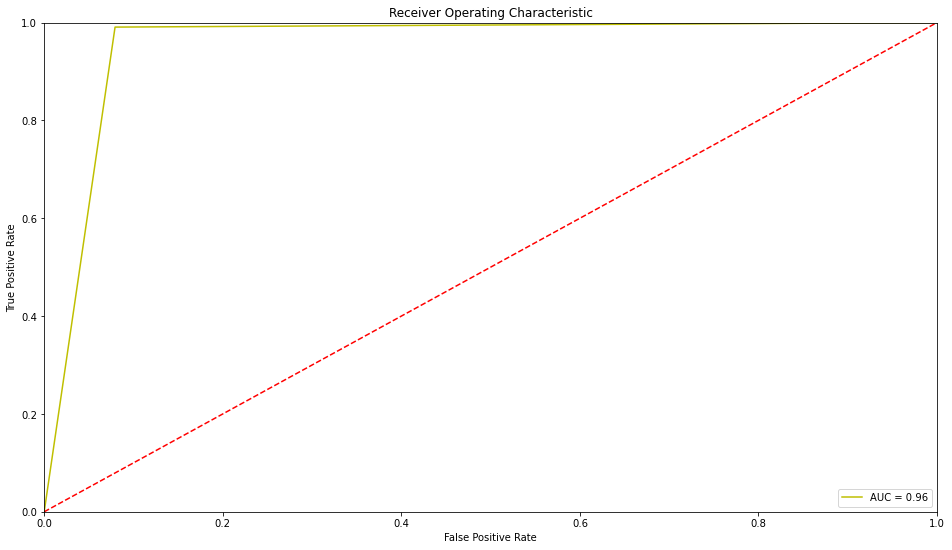

In [9]:
y_pred = gradient_booster.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# With Changes in Parameters (for practice)

In [10]:
estimator = GradientBoostingClassifier()
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 'min_samples_leaf': [10, 20, 50], 'learning_rate': [0.1, 0.01]}

In [11]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.987, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.985, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.999, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.996, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.990, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.989, total=   0.6s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.987, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.997, total=   0.6s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.997, total=   0.6s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.988, 

[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200, score=0.993, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200, score=0.985, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200, score=0.999, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200, score=0.996, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=200, score=0.980, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=10, min_samples_leaf=50, n_estimators=500, score=0.994,

[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500, score=0.990, total=   1.8s
[CV] learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500, score=0.995, total=   1.7s
[CV] learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500, score=0.996, total=   1.8s
[CV] learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=500, score=0.986, total=   1.8s
[CV] learning_rate=0.1, max_depth=20, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=50, n_estimators=50, score=0.990, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=20, min_samples_leaf=50, n_estimators=50, score=0.990, tot

[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50, score=0.999, total=   0.2s
[CV] learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50, score=0.995, total=   0.2s
[CV] learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50, score=0.979, total=   0.2s
[CV] learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100, score=0.987, total=   0.4s
[CV] learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100, score=0.987, total=   0.4s
[CV] learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100, score=0.995, tota

[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=100, score=0.996, total=   0.6s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=100, score=0.989, total=   0.6s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200, score=0.987, total=   1.2s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200, score=0.987, total=   1.2s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200, score=0.997, total=   1.1s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=10, n_estimators=200, s

[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=200, score=0.997, total=   0.4s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=200, score=0.976, total=   0.4s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500, score=0.995, total=   1.0s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500, score=0.986, total=   1.1s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500, score=0.999, total=   1.1s
[CV] learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500, s

[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=20, n_estimators=500, score=0.994, total=   3.9s
[CV] learning_rate=0.01, max_depth=10, min_samples_leaf=20, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=20, n_estimators=500, score=0.982, total=   3.2s
[CV] learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50, score=0.985, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50, score=0.990, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50, score=0.998, total=   0.3s
[CV] learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50, score=0.9

[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50, score=0.969, total=   0.2s
[CV] learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100, score=0.986, total=   0.3s
[CV] learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100, score=0.990, total=   0.4s
[CV] learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100, score=0.998, total=   0.4s
[CV] learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100, score=0.992, total=   0.4s
[CV] learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=100, sc

[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=100, score=0.970, total=   0.5s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200, score=0.986, total=   1.4s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200, score=0.985, total=   1.3s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200, score=0.999, total=   1.3s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200, score=0.996, total=   1.3s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=200, s

[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=200, score=0.972, total=   0.4s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500, score=0.990, total=   1.0s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500, score=0.991, total=   1.0s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500, score=0.999, total=   1.0s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500, score=0.996, total=   1.1s
[CV] learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500 
[CV]  learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=500, s

[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=20, n_estimators=500, score=0.985, total=   1.8s
[CV] learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.985, total=   0.1s
[CV] learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.990, total=   0.1s
[CV] learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.998, total=   0.1s
[CV] learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.992, total=   0.1s
[CV] learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=50, 

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  7.2min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [12]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [13]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	learning_rate: 0.1
	max_depth: 20
	min_samples_leaf: 10
	n_estimators: 200


In [14]:
print(classification_report(y_test,cv_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Confusion Matrix : 
 [[ 58   5]
 [  1 107]]
Accuracy Score is 0.9649
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

AUC-ROC: 0.9556878306878308
LOGLOSS Value is 1.2119


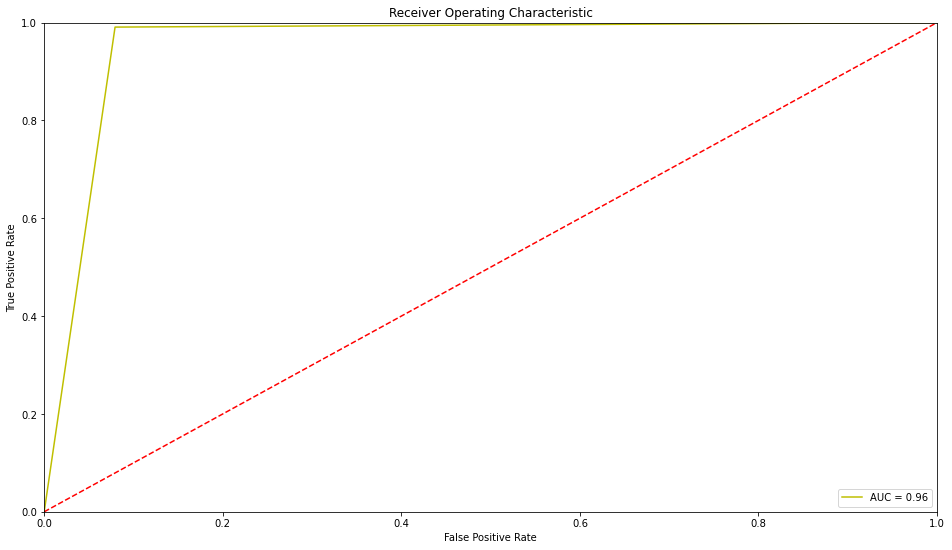

In [15]:
y_pred = cv_grid.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()